# MLB Umpire Rankings

The data was taken from a Kaggle dataset on MLB umpire performance scorecards from 2015-2022.

https://www.kaggle.com/datasets/mattop/mlb-baseball-umpire-scorecards-2015-2022/data

In [116]:
# Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy import stats
import statistics
from functools import reduce

In [117]:
# Importing Dataset

ump = pd.read_csv('mlb-umpire-scorecard.csv')

In [118]:
# Head

ump.head()

,id,date,umpire,home,away,home_team_runs,away_team_runs,pitches_called,incorrect_calls,expected_incorrect_calls,correct_calls,expected_correct_calls,correct_calls_above_expected,accuracy,expected_accuracy,accuracy_above_expected,consistency,favor_home,total_run_impact
0,1,2022-11-05,Lance Barksdale,HOU,PHI,4,1,124,4,10,120,114,6,96.8,92,4.8,97.6,0.09,0.75
1,2,2022-11-03,Jordan Baker,PHI,HOU,2,3,149,6,7.4,143,141.6,1.4,96,95,0.9,97.3,-0.12,0.58
2,3,2022-11-02,Tripp Gibson,PHI,HOU,0,5,124,7,7.1,117,116.9,0.1,94.4,94.3,0.1,92.7,-0.1,0.56
3,4,2022-11-01,Dan Iassogna,PHI,HOU,7,0,140,5,6,135,134,1,96.4,95.7,0.7,92.9,0.63,0.73
4,5,2022-10-29,Pat Hoberg,HOU,PHI,5,2,129,0,8.7,129,120.3,8.7,100,93.2,6.8,96.1,0,0


In [119]:
# Tail

ump.tail()

,id,date,umpire,home,away,home_team_runs,away_team_runs,pitches_called,incorrect_calls,expected_incorrect_calls,correct_calls,expected_correct_calls,correct_calls_above_expected,accuracy,expected_accuracy,accuracy_above_expected,consistency,favor_home,total_run_impact
18208,18209,2015-04-06,Jeff Nelson,MIA,ATL,1,2,130,12,12.7,118,117.3,0.7,90.8,90.3,0.5,93.8,-0.28,1.42
18209,18210,2015-04-06,Ted Barrett,HOU,CLE,2,0,124,21,14.2,103,109.8,-6.8,83.1,88.5,-5.5,91.9,0.51,1.97
18210,18211,2015-04-06,Bill Miller,OAK,TEX,8,0,180,21,20.9,159,159.1,-0.1,88.3,88.4,-0.1,87.2,-0.4,2.44
18211,18212,2015-04-06,Gary Cederstrom,ARI,SF,4,5,148,9,12.2,139,135.8,3.2,93.9,91.7,2.2,94.6,-0.36,0.84
18212,18213,2015-04-05,Mike Winters,CHC,STL,0,3,158,17,14.7,141,143.3,-2.3,89.2,90.7,-1.5,94.9,1.1,4.36


In [120]:
# Datatypes

ump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18213 entries, 0 to 18212
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            18213 non-null  int64 
 1   date                          18213 non-null  object
 2   umpire                        18213 non-null  object
 3   home                          18213 non-null  object
 4   away                          18213 non-null  object
 5   home_team_runs                18213 non-null  int64 
 6   away_team_runs                18213 non-null  int64 
 7   pitches_called                18213 non-null  object
 8   incorrect_calls               18213 non-null  object
 9   expected_incorrect_calls      18213 non-null  object
 10  correct_calls                 18213 non-null  object
 11  expected_correct_calls        18213 non-null  object
 12  correct_calls_above_expected  18213 non-null  object
 13  accuracy        

In [121]:
# Removing 'ND' values

ump = ump[ump.pitches_called != 'ND']

In [122]:
# Datatypes

ump.count()

id                              18093
date                            18093
umpire                          18093
home                            18093
away                            18093
home_team_runs                  18093
away_team_runs                  18093
pitches_called                  18093
incorrect_calls                 18093
expected_incorrect_calls        18093
correct_calls                   18093
expected_correct_calls          18093
correct_calls_above_expected    18093
accuracy                        18093
expected_accuracy               18093
accuracy_above_expected         18093
consistency                     18093
favor_home                      18093
total_run_impact                18093
dtype: int64

In [123]:
# Converting Datatypes

ump['date'] = pd.to_datetime(ump['date'])
ump['pitches_called'] = pd.to_numeric(ump.pitches_called, errors='coerce')
ump['incorrect_calls'] = pd.to_numeric(ump.incorrect_calls, errors='coerce')
ump['expected_incorrect_calls'] = pd.to_numeric(ump.expected_incorrect_calls, errors='coerce')
ump['correct_calls'] = pd.to_numeric(ump.correct_calls, errors='coerce')
ump['expected_correct_calls'] = pd.to_numeric(ump.expected_correct_calls, errors='coerce')
ump['correct_calls_above_expected'] = pd.to_numeric(ump.correct_calls_above_expected, errors='coerce')
ump['accuracy'] = pd.to_numeric(ump.accuracy, errors='coerce')
ump['expected_accuracy'] = pd.to_numeric(ump.expected_accuracy, errors='coerce')
ump['accuracy_above_expected'] = pd.to_numeric(ump.accuracy_above_expected, errors='coerce')
ump['consistency'] = pd.to_numeric(ump.consistency, errors='coerce')
ump['favor_home'] = pd.to_numeric(ump.favor_home, errors='coerce')
ump['total_run_impact'] = pd.to_numeric(ump.total_run_impact, errors='coerce')

In [124]:
# Show Datatypes again

ump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18093 entries, 0 to 18212
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            18093 non-null  int64         
 1   date                          18093 non-null  datetime64[ns]
 2   umpire                        18093 non-null  object        
 3   home                          18093 non-null  object        
 4   away                          18093 non-null  object        
 5   home_team_runs                18093 non-null  int64         
 6   away_team_runs                18093 non-null  int64         
 7   pitches_called                18093 non-null  int64         
 8   incorrect_calls               18093 non-null  int64         
 9   expected_incorrect_calls      18093 non-null  float64       
 10  correct_calls                 18093 non-null  int64         
 11  expected_correct_calls      

In [125]:
# Descriptive Statistics

ump.describe()

,id,home_team_runs,away_team_runs,pitches_called,incorrect_calls,expected_incorrect_calls,correct_calls,expected_correct_calls,correct_calls_above_expected,accuracy,expected_accuracy,accuracy_above_expected,consistency,favor_home,total_run_impact
count,18093.000000,18093.000000,18093.000000,18093.000000,18093.000000,18093.000000,18093.000000,18093.000000,18093.000000,18093.000000,18093.000000,18093.000000,18093.000000,18093.000000,18093.000000
mean,9097.235063,4.560880,4.432046,154.562538,11.704969,11.916371,142.857569,142.646167,0.211402,92.420920,92.284171,0.135583,93.170536,0.034539,1.532298
std,5265.213979,3.153966,3.204674,24.212565,4.629384,3.228460,22.842940,22.560097,3.412681,2.779731,1.733561,2.228245,2.254605,0.637280,0.773497
min,1.000000,0.000000,0.000000,68.000000,0.000000,3.100000,63.000000,63.000000,-24.500000,78.400000,85.000000,-11.700000,81.400000,-3.450000,0.000000
25%,4534.000000,2.000000,2.000000,138.000000,8.000000,9.600000,127.000000,127.500000,-1.900000,90.700000,91.200000,-1.300000,91.700000,-0.330000,0.970000
50%,9085.000000,4.000000,4.000000,153.000000,11.000000,11.600000,141.000000,141.100000,0.400000,92.700000,92.500000,0.200000,93.300000,0.030000,1.410000
75%,13677.000000,6.000000,6.000000,169.000000,14.000000,13.900000,156.000000,155.900000,2.500000,94.400000,93.500000,1.700000,94.700000,0.400000,1.950000
max,18213.000000,29.000000,28.000000,375.000000,45.000000,43.900000,331.000000,331.100000,16.100000,100.000000,97.400000,9.400000,100.000000,3.400000,7.140000


Looking at the descriptive statistics above, there were 18,093 games in the dataset. The average number of pitches called per game was 154.6 with an average of 11.7 incorrect calls and 142.9 correct calls. The average accuracy was 92.4% and the average consistency was 93.2%.

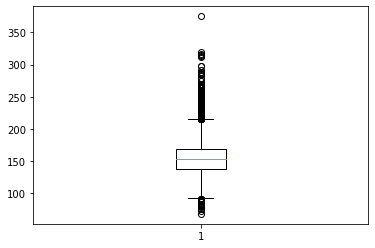

In [126]:
# Boxplot of 'pitches_called'

plt.boxplot(ump['pitches_called'])
plt.show()

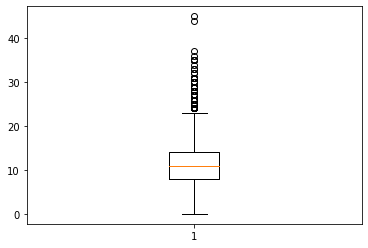

In [127]:
# Boxplot of 'incorrect_calls'

plt.boxplot(ump['incorrect_calls'])
plt.show()

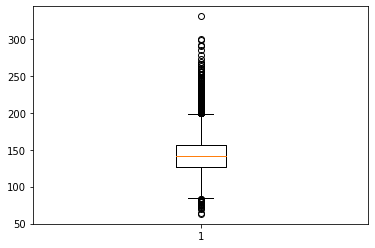

In [128]:
# Boxplot of 'correct_calls'

plt.boxplot(ump['correct_calls'])
plt.show()

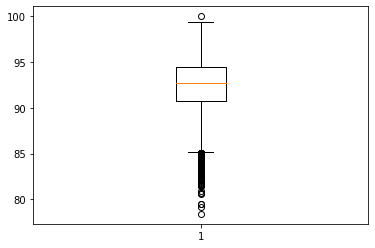

In [129]:
# Boxplot of 'accuracy'

plt.boxplot(ump['accuracy'])
plt.show()

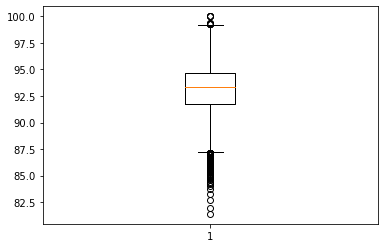

In [130]:
# Boxplot of 'consistency'

plt.boxplot(ump['consistency'])
plt.show()

In [131]:
# Grouping by Umpire

ump_group = ump.groupby('umpire')

In [132]:
# Counting number of games for each Umpire

ump_games = ump_group['id'].count().sort_values(ascending=False)
ump_games = pd.DataFrame(ump_games).reset_index()
ump_games

,umpire,id
0,Bill Miller,239
1,Adam Hamari,234
2,Jerry Meals,229
3,Dan Bellino,228
4,Ted Barrett,228
...,...,...
119,Alex MacKay,6
120,David Arrieta,5
121,Marcus Pattillo,5
122,Lew Williams,4


In [133]:
# Average accuracy for each Umpire

ump_accuracy = ump_group['accuracy'].mean().sort_values(ascending=False)
ump_accuracy = pd.DataFrame(ump_accuracy).reset_index()
ump_accuracy

,umpire,accuracy
0,John Libka,94.956667
1,Brock Ballou,94.900000
2,Edwin Moscoso,94.639759
3,Jeremie Rehak,94.630894
4,Jansen Visconti,94.567669
...,...,...
119,Dale Scott,89.653571
120,Bob Davidson,89.491525
121,John Hirschbeck,89.463636
122,Tim Welke,88.567857


In [134]:
# Average consistency for each Umpire

ump_consistency = ump_group['consistency'].mean().sort_values(ascending=False)
ump_consistency = pd.DataFrame(ump_consistency).reset_index()
ump_consistency

,umpire,consistency
0,Brock Ballou,95.200000
1,Charlie Ramos,94.276000
2,Shane Livensparger,94.144318
3,Adam Beck,94.104839
4,Jansen Visconti,93.996992
...,...,...
119,Kerwin Danley,92.198667
120,Dale Scott,91.714286
121,Tim Welke,91.571429
122,John Hirschbeck,91.436364


In [135]:
# Total pitches called for each Umpire

ump_pitches_called = ump_group['pitches_called'].sum().sort_values(ascending=False)
ump_pitches_called = pd.DataFrame(ump_pitches_called).reset_index()
ump_pitches_called

,umpire,pitches_called
0,Jerry Meals,36134
1,Bill Miller,36065
2,Marvin Hudson,35973
3,Alfonso Marquez,35615
4,Jordan Baker,35536
...,...,...
119,Alex MacKay,917
120,Marcus Pattillo,798
121,David Arrieta,734
122,Lew Williams,619


In [136]:
# Total incorrect calls for each Umpire

ump_incorrect_calls = ump_group['incorrect_calls'].sum().sort_values(ascending=False)
ump_incorrect_calls = pd.DataFrame(ump_incorrect_calls).reset_index()
ump_incorrect_calls

,umpire,incorrect_calls
0,Ted Barrett,3057
1,Laz Diaz,3003
2,Jerry Meals,2998
3,Joe West,2917
4,Angel Hernandez,2877
...,...,...
119,Brock Ballou,57
120,Alex MacKay,53
121,David Arrieta,50
122,Lew Williams,36


In [137]:
# Total correct calls for each Umpire

ump_correct_calls = ump_group['correct_calls'].sum().sort_values(ascending=False)
ump_correct_calls = pd.DataFrame(ump_correct_calls).reset_index()
ump_correct_calls

,umpire,correct_calls
0,Bill Miller,33292
1,Jerry Meals,33136
2,Marvin Hudson,33127
3,Adam Hamari,33062
4,Alfonso Marquez,33000
...,...,...
119,Alex MacKay,864
120,Marcus Pattillo,703
121,David Arrieta,684
122,Lew Williams,583


In [138]:
# Merging all 6 dfs with ump data together

ump_data = [ump_games, ump_accuracy, ump_consistency, ump_pitches_called, ump_incorrect_calls, ump_correct_calls]
merged_ump_data = reduce(lambda  left,right: pd.merge(left,right,on=['umpire'],
                                            how='outer'), ump_data)
merged_ump_data

,umpire,id,accuracy,consistency,pitches_called,incorrect_calls,correct_calls
0,Bill Miller,239,92.329707,93.209623,36065,2773,33292
1,Adam Hamari,234,93.045726,93.475641,35520,2458,33062
2,Jerry Meals,229,91.651528,92.897817,36134,2998,33136
3,Dan Bellino,228,92.843860,93.326316,34934,2502,32432
4,Ted Barrett,228,91.337281,92.457018,35489,3057,32432
...,...,...,...,...,...,...,...
119,Alex MacKay,6,94.050000,93.700000,917,53,864
120,David Arrieta,5,93.140000,92.680000,734,50,684
121,Marcus Pattillo,5,87.800000,91.360000,798,95,703
122,Lew Williams,4,94.225000,93.475000,619,36,583


In [139]:
merged_ump_data = pd.DataFrame(merged_ump_data)
merged_ump_data.describe()

,id,accuracy,consistency,pitches_called,incorrect_calls,correct_calls
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,145.911290,92.469171,93.189922,22552.419355,1707.887097,20844.532258
std,75.918871,1.277075,0.540390,11734.800021,915.328252,10847.614676
min,1.000000,87.800000,91.360000,161.000000,13.000000,148.000000
25%,62.000000,91.667240,92.856904,9448.000000,873.000000,8901.750000
50%,172.500000,92.649303,93.245795,26504.000000,2063.500000,24637.500000
75%,212.250000,93.235186,93.514630,32993.250000,2459.250000,30525.250000
max,239.000000,94.956667,95.200000,36134.000000,3057.000000,33292.000000


# Angel Hernandez

How does Angel Hernandez compare to other umpires in accuracy and consistency?

In [140]:
# Filtering for Angel Hernadez

angel = ump.loc[ump['umpire'] == 'Angel Hernandez']
angel

,id,date,umpire,home,away,home_team_runs,away_team_runs,pitches_called,incorrect_calls,expected_incorrect_calls,correct_calls,expected_correct_calls,correct_calls_above_expected,accuracy,expected_accuracy,accuracy_above_expected,consistency,favor_home,total_run_impact
59,60,2022-10-04,Angel Hernandez,NYM,WSH,8,0,162,8,9.0,154,153.0,1.0,95.1,94.5,0.6,90.7,0.70,0.98
125,126,2022-09-30,Angel Hernandez,HOU,TB,3,7,124,5,5.9,119,118.1,0.9,96.0,95.2,0.7,94.4,0.39,1.23
194,195,2022-09-24,Angel Hernandez,OAK,NYM,10,4,142,10,8.8,132,133.2,-1.2,93.0,93.8,-0.9,90.8,0.21,1.23
251,252,2022-09-20,Angel Hernandez,LAD,ARI,2,5,117,7,7.9,110,109.1,0.9,94.0,93.2,0.8,90.6,-0.29,0.67
375,376,2022-09-11,Angel Hernandez,MIA,NYM,3,9,138,4,7.3,134,130.7,3.3,97.1,94.7,2.4,94.2,0.03,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17869,17870,2015-05-02,Angel Hernandez,SD,COL,4,2,152,18,15.2,134,136.8,-2.8,88.2,90.0,-1.8,96.1,0.48,1.76
17920,17921,2015-04-28,Angel Hernandez,OAK,LAA,6,2,126,13,12.6,113,113.4,-0.4,89.7,90.0,-0.3,92.1,0.30,1.22
17982,17983,2015-04-23,Angel Hernandez,MIL,CIN,4,2,135,10,12.0,125,123.0,2.0,92.6,91.1,1.5,93.3,-0.16,1.10
18134,18135,2015-04-12,Angel Hernandez,ARI,LAD,4,7,164,22,19.7,142,144.3,-2.3,86.6,88.0,-1.4,90.2,1.20,3.20


In [141]:
# Descriptive Statistics for Angel Hernadez

angel.describe()

,id,home_team_runs,away_team_runs,pitches_called,incorrect_calls,expected_incorrect_calls,correct_calls,expected_correct_calls,correct_calls_above_expected,accuracy,expected_accuracy,accuracy_above_expected,consistency,favor_home,total_run_impact
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,9200.801762,4.321586,4.770925,155.784141,12.674009,12.119383,143.110132,143.664758,-0.554626,91.885022,92.218062,-0.330396,92.676652,-0.003128,1.681982
std,5272.348662,2.801330,3.305994,24.904279,4.843514,3.309904,23.192943,23.137723,3.405840,2.821072,1.749356,2.227901,2.105709,0.642306,0.807817
min,60.000000,0.000000,0.000000,93.000000,2.000000,4.500000,87.000000,88.500000,-11.600000,83.900000,86.400000,-6.500000,85.900000,-2.900000,0.250000
25%,4773.500000,2.000000,2.000000,139.000000,9.000000,9.750000,127.500000,129.100000,-2.850000,90.100000,91.100000,-1.800000,91.250000,-0.380000,1.085000
50%,9149.000000,4.000000,4.000000,155.000000,13.000000,11.900000,140.000000,141.900000,-0.500000,92.300000,92.300000,-0.300000,92.700000,0.010000,1.550000
75%,13808.500000,6.000000,7.000000,169.000000,16.000000,14.200000,155.000000,155.850000,1.600000,93.800000,93.400000,1.100000,94.100000,0.380000,2.205000
max,18185.000000,13.000000,19.000000,252.000000,29.000000,24.000000,236.000000,232.800000,8.200000,98.300000,95.700000,5.800000,98.500000,1.820000,4.180000


##### Looking at the descriptive statistics above for Angel Hernandez, he called a total of 227 games behind the plate over the 8 year period from 2015-2022. 
##### The average number of pitches he called per game was 155.8 compared to league average of 154.6. 
##### He had an average of 12.7 incorrect calls compared to the league average of 11.7. 
##### He had an average of 143.1 correct calls compared to the league average of 142.9. 
##### He had an average accuracy of 91.9% compared to the league average of 92.4%. 
##### He had an average consistency of 92.7% compared to the league average of 93.2%.

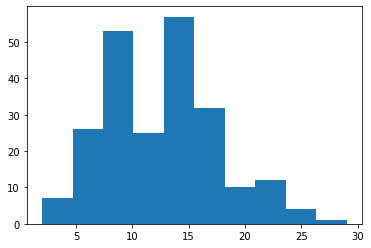

In [142]:
# Histogram for Angel Hernadez for Incorrect Calls

plt.hist(angel['incorrect_calls'])
plt.show()

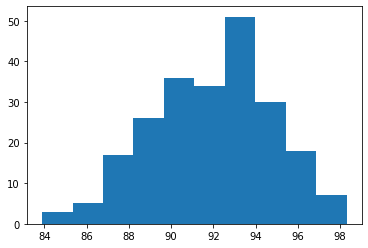

In [143]:
# Histogram for Angel Hernadez for Accuracy

plt.hist(angel['accuracy'])
plt.show()

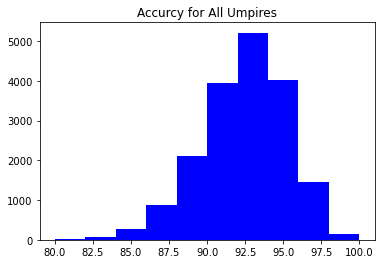

In [144]:
# Histogram of 'accuracy' for All umps

plt.hist(ump['accuracy'], color='blue', range=(80,100))
plt.title('Accurcy for All Umpires')
plt.show()

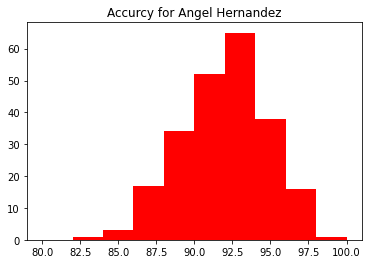

In [145]:
# Histogram of 'accuracy' for Angel Hernadez

plt.hist(angel['accuracy'], color='red', range=(80,100))
plt.title('Accurcy for Angel Hernandez')
plt.show()

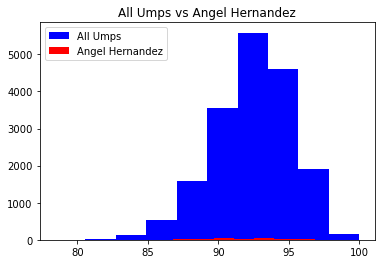

In [146]:
# Histogram of 'accuracy' for All umps and for Angel Hernadez

plt.hist(ump['accuracy'], color='blue')
plt.hist(angel['accuracy'], color='red')
plt.title('All Umps vs Angel Hernandez')
plt.legend(['All Umps', 'Angel Hernandez'])
plt.show()

In [147]:
# Average Accurarcy for all umpires and for Angel Hernandez

print("Average Umpire Accuracy:", ump['accuracy'].mean())
print("Angel Hernandez Accuracy:", angel['accuracy'].mean())

Average Umpire Accuracy: 92.42091969269816
Angel Hernandez Accuracy: 91.88502202643177


In [148]:
# Average Consistency for all umpires and for Angel Hernandez

print("Average Umpire Consistency:", ump['consistency'].mean())
print("Angel Hernandez Consistency:", angel['consistency'].mean())

Average Umpire Consistency: 93.17053556624005
Angel Hernandez Consistency: 92.67665198237883


Where Does Angel Hernandez rank amount umpires in games, accuracy, consistency, pitches called, incorrect calls, and correct calls?
There are 124 umpires in the dataset

In [149]:
# Games

ump_games.loc[ump_games['umpire'] == 'Angel Hernandez']

,umpire,id
8,Angel Hernandez,227


Angel Hernandez ranks 8th in total games called among the 124 umpires with 227 games called

In [150]:
# Accuracy

ump_accuracy.loc[ump_accuracy['umpire'] == 'Angel Hernandez']

,umpire,accuracy
85,Angel Hernandez,91.885022


Angel Hernandez ranks 85th in average accuracy among the 124 umpires with an average accuracy of 91.9%

In [151]:
# Consistency

ump_consistency.loc[ump_consistency['umpire'] == 'Angel Hernandez']

,umpire,consistency
108,Angel Hernandez,92.676652


Angel Hernandez ranks 108th in average consistency among the 124 umpires with an average consitency of 92.7%

In [152]:
# Pitches called

ump_pitches_called.loc[ump_pitches_called['umpire'] == 'Angel Hernandez']

,umpire,pitches_called
7,Angel Hernandez,35363


Angel Hernandez ranks 7th in total pitches called among the 124 umpires with a total of 35,363 pitches called

In [153]:
# Incorrect Calls

ump_incorrect_calls.loc[ump_incorrect_calls['umpire'] == 'Angel Hernandez']

,umpire,incorrect_calls
4,Angel Hernandez,2877


Angel Hernandez ranks 4th in total incorrect calls among the 124 umpires with 2,877 incorrect calls

In [154]:
# Correct calls

ump_correct_calls.loc[ump_correct_calls['umpire'] == 'Angel Hernandez']

,umpire,correct_calls
8,Angel Hernandez,32486


    Angel Hernandez ranks 8th in total correct calls among the 124 umpires with 32,486 correct calls

In [155]:
# ANOVA (Analysis of Variance)
# ANOVA to determine if there is a statistically significant difference in means between the average accuracy and consistency between all umpires and Angel Hernandez

In [156]:
# ANOVA for Accuracy

f_oneway(ump['accuracy'], angel['accuracy'])

F_onewayResult(statistic=8.329304946781889, pvalue=0.0039056142164217273)

In [157]:
# ANOVA for Consistency

f_oneway(ump['consistency'], angel['consistency'])

F_onewayResult(statistic=10.774668841975759, pvalue=0.0010309124582802008)

In [158]:
# T Test
# T Test to determine the statistical significance of the difference in means between the average accuracy and consistency between all umpires and Angel Hernandez

In [159]:
# T Test for Accuracy

stats.ttest_1samp(angel['accuracy'], ump['accuracy'].mean())

Ttest_1sampResult(statistic=-2.8620724537637443, pvalue=0.004604008596156956)

In [160]:
# T Test for Consistency

stats.ttest_1samp(angel['consistency'], ump['consistency'].mean())

Ttest_1sampResult(statistic=-3.53377737940621, pvalue=0.0004966912075511381)

Given the low pvalues below 0.05 for both ANOVA and the T Test, we can reject the null hypothesis and conclude that Angel Hernandez was a statistically significantly below average umpire according the the metrics of accuracy and consistency.